In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb
sb.set_style("white")

# Lest do the trapz rule in a C way

In [2]:
def trapz_rule(fun,a,b,N):
    delta = (b - a) / (N-1.0)
    limits = np.linspace(a,b,N)
    
    count = 0.0
    for i in range(1,N-1):
        count += fun(limits[i])
    
    integral = fun(limits[0]) + 2.0*count + fun(limits[-1])
    return (delta/2.0) * integral

# The python way

In [3]:
def trapz_py(fun,limits):
    delta = (limits[-1]-limits[0])/(len(limits)-1.0)
    
    count = 2.0 * np.sum(fun(limits[1:-1]))
    integral = fun(limits[0]) + count + fun(limits[-1])
    
    return (delta/2.0) * integral

In [4]:
kernel = lambda x: np.cos(x)**2

In [5]:
x = np.linspace(0.0,np.pi/2.0,11)

In [6]:
inte_c = trapz_rule(kernel,0.0,np.pi/2.0,11)
print inte_c

0.7853981633974484


In [7]:
inte_p = trapz_py(kernel,x)
print inte_p

0.7853981633974483


In [8]:
inte_py = np.trapz(kernel(x),x)
print inte_py

0.7853981633974483


# Lets calculate some means
first let me show you a fast way to load multiple files

here's the link for the data :https://drive.google.com/drive/folders/1aNqqGCEBHvqwE3PdumOQVceiK-t6O-JD?usp=sharing

In [9]:
from glob import glob

In [10]:
data_buffer = glob('data_mean/data_*.dat')

In [11]:
print data_buffer

['data_mean/data_0.dat', 'data_mean/data_1.dat', 'data_mean/data_2.dat', 'data_mean/data_3.dat', 'data_mean/data_4.dat', 'data_mean/data_5.dat', 'data_mean/data_6.dat', 'data_mean/data_7.dat', 'data_mean/data_8.dat']


In [12]:
for d in data_buffer:
    data_countv1  = np.loadtxt(d)

In [13]:
print np.shape(data_countv1)

(100,)


In [14]:
data_countv2 = [np.loadtxt(d) for d in data_buffer]

In [15]:
print np.shape(data_countv2)

(9, 100)


In [32]:
data_countv3 = []
for d in data_buffer:
    data_countv3.append(np.loadtxt(d))
print np.shape(data_countv3)

(9, 100)


In [16]:
r = np.linspace(0,500,100)

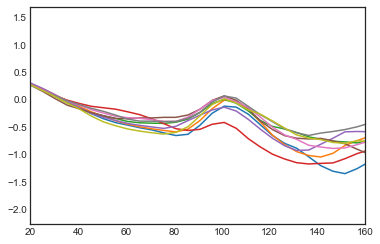

In [18]:
for i in range(len(data_countv2)):
    plt.plot(r,data_countv2[i]*pow(r,2));
plt.xlim(20,160);

In [19]:
data_array = np.array(data_countv2).T

with all the possible loops

In [20]:
means = np.zeros(len(data_array))
for i in range(len(data_array)):
    count = 0.0
    for j in range(len(data_array.T)):
        count += data_array[i][j]
    means[i] = count/len(data_array.T)

one less loop

In [21]:
means_v2 = np.zeros(len(data_array))
for i in range(len(data_array)):
    means_v2[i] = np.sum(data_array[i]) / len(data_array.T)

without loops

In [22]:
mean_py = np.sum(data_array,axis=-1) / len(data_array.T)

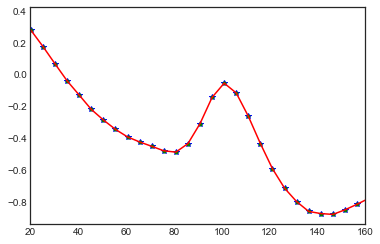

In [23]:
plt.plot(r,means_v2*pow(r,2),'*b');
plt.plot(r,mean_py*pow(r,2),'.g');
plt.plot(r,means*pow(r,2),'r');
plt.xlim(20,160);

# Calculate the $\sigma^2$

visualizacion de la matriz de correlacion de jla

# Heatmaps

In [24]:
fligths_log = sb.load_dataset('flights')
flights = fligths_log.pivot("month", "year", "passengers")

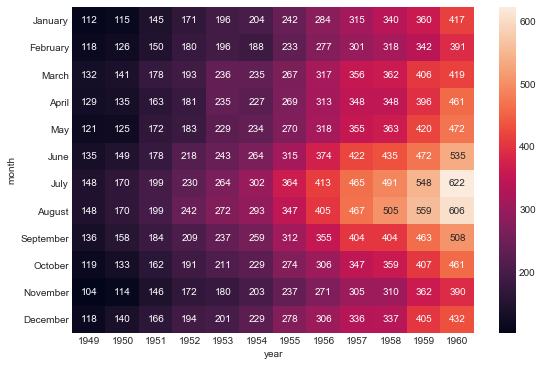

In [25]:
f, ax = plt.subplots(figsize=(9, 6))
sb.heatmap(flights,annot=True, fmt="d",ax=ax);

# Covariance matrix

In [26]:
cov_jla = np.loadtxt('/Users/Oleg/Documents/TallerCosmoProject/data/jla_mub_covmatrix.dat')[1:]

In [27]:
print np.shape(cov_jla)

(961,)


In [28]:
cov_jla = cov_jla.reshape((31,31))
print np.shape(cov_jla)

(31, 31)


# Correlation matrix

In [29]:
def corr_matrix(cov_matrix):
    R_new = np.zeros((len(cov_matrix),len(cov_matrix)))
    for i in range(len(cov_matrix)):
        for j in range(len(cov_matrix)):
            R_new[i][j] = cov_matrix[i][j] / np.sqrt(cov_matrix[i][i]*cov_matrix[j][j])
    return R_new

In [30]:
R_mat = corr_matrix(cov_jla)

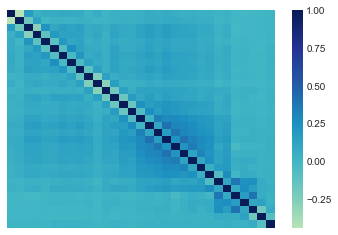

In [31]:
sb.heatmap(R_mat,center=0.0,cmap='YlGnBu',xticklabels=False, yticklabels=False);